# Import

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout, Add, AvgPool2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer

# Load MNIST data

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train/255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
print(X_train.shape)

(60000, 28, 28, 1)


# Build model

In [4]:
def build_model(input_shape, classes):
    input = Input(shape=input_shape)
    C1 = Conv2D(kernel_size=(3,3), filters=8, activation='relu', padding='same') (input)
    P1 = MaxPool2D(strides=2) (C1)

    C2 = Conv2D(kernel_size=(3,3), filters=8, activation='relu', padding='same') (P1)
    C3 = Conv2D(kernel_size=(3,3), filters=8, activation='relu', padding='same') (C2)

    add1 = Add () ([P1, C3])
    C4 = Conv2D(kernel_size=(3,3), filters=16, strides=(2, 2), activation='relu', padding='same') (add1)
    C5 = Conv2D(kernel_size=(3,3), filters=16, activation='relu', padding='same') (C4)
    C6 = Conv2D(kernel_size=(3,3), filters=16, activation='relu', padding='same') (C5)
    
    add2 = Add()([C4, C6])
    P2 = AvgPool2D()(add2)
    F1 = Flatten()(P2)

    D1 = Dense (400, activation='relu')(F1)
    output = Dense(classes, activation='softmax') (D1)
    model = Model(input, output)
    return model

In [5]:
model = build_model(X_train[0].shape, 10)

In [6]:
model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(lr=1e-3),
        metrics=['accuracy']
    )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 8)    80          ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 14, 14, 8)    0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 14, 14, 8)    584         ['max_pooling2d[0][0]']          
                                                                                              

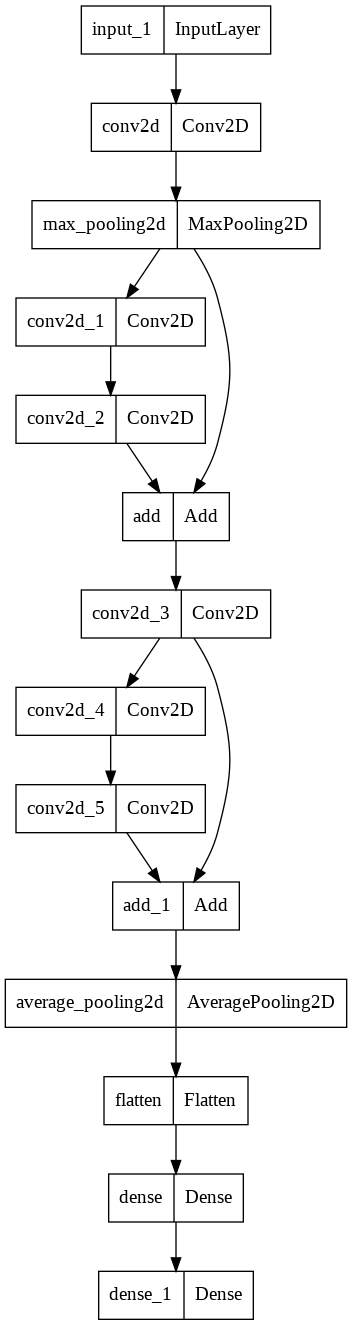

In [8]:
tf.keras.utils.plot_model(model)

# Patience

In [9]:
patience = 3
stop_patience = 5
factor = 0.1
callbacks = [
    ModelCheckpoint("miniresnet.h5", save_best_only=True, verbose = 0),
    EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, min_lr=1e-6, verbose=1)
]

# Train model

In [10]:
batch_size=32
epochs=100
history = model.fit(X_train, 
          y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=callbacks,
          verbose=1)

Epoch 1/100
1500/1500 [==============================] - 41s 7ms/step - loss: 0.2512 - accuracy: 0.9199 - val_loss: 0.0794 - val_accuracy: 0.9758 - lr: 0.0010
Epoch 2/100
  18/1500 [..............................] - ETA: 9s - loss: 0.0707 - accuracy: 0.9826

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


1500/1500 [==============================] - 10s 7ms/step - loss: 0.0802 - accuracy: 0.9751 - val_loss: 0.0573 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 3/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0572 - accuracy: 0.9815 - val_loss: 0.0556 - val_accuracy: 0.9827 - lr: 0.0010
Epoch 4/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0496 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0381 - accuracy: 0.9882 - val_loss: 0.0501 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 6/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.0504 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 7/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0423 - val_accuracy: 0.9869 - lr: 0.0010
Epoch 8/100
1500/1500 [==============================] - 1

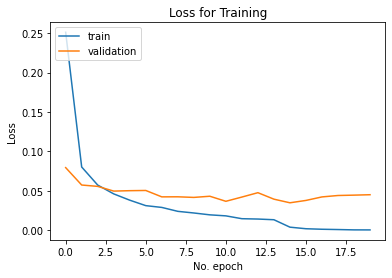

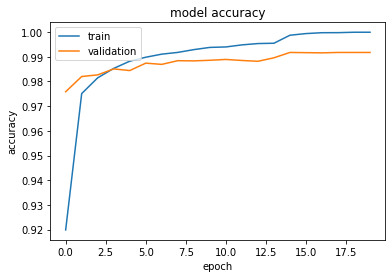

In [13]:
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for Training')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
X_test = X_test/255
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0321 - accuracy: 0.9924


[0.03208976611495018, 0.9923999905586243]

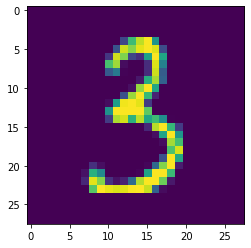

Predicted label:  3
Ground-truth label:  3


In [18]:
pred = model.predict(X_test)
index = 76
plt.imshow(X_test[index])
plt.show()
print('Predicted label: ', np.argmax(pred[index]))
print('Ground-truth label: ', y_test[index])

In [19]:
import numpy as np
prediction = model.predict(X_test)
y_pred = [np.argmax(prediction[i]) for i in range(len(X_test))]

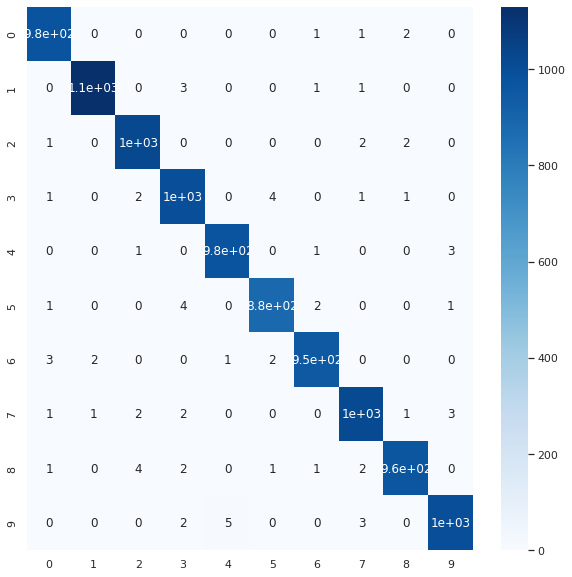

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = [_ for _ in range(10)]
confusion_matrix = confusion_matrix(y_test, y_pred, labels)
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(confusion_matrix, annot=True, cmap='Blues') 